In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# #Plot all averaged data

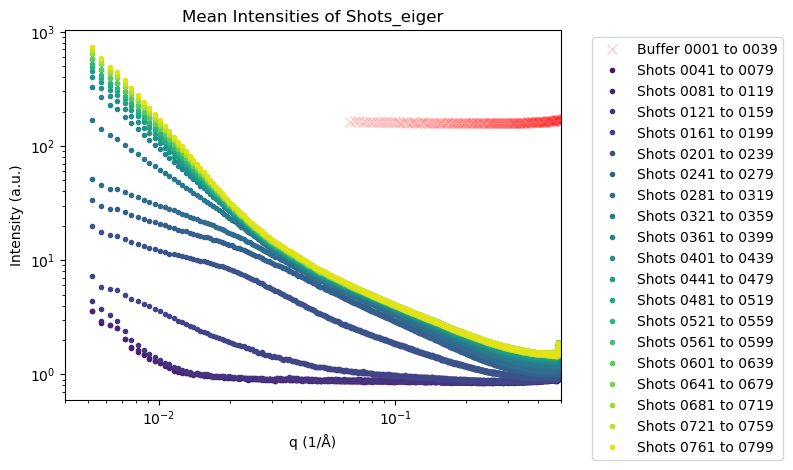

In [2]:
# Define the shot ranges
shots = [(41, 79), (81, 119), (121, 159), (161, 199), (201, 239), (241, 279), (281, 319), 
         (321, 359), (361, 399), (401, 439), (441, 479), (481, 519), (521, 559), (561, 599), (601, 639), (641, 679), (681, 719), (721, 759), (761, 799)]

buffer = (1,39)

plt.figure()

bufferdata = np.loadtxt(f'pilatus_mean/mean_shots_{buffer[0]:04d}_to_{buffer[1]:04d}.dat')
plt.plot(bufferdata[:, 0], bufferdata[:, 1], 'x', markersize = 7, color='red', label=f'Buffer {buffer[0]:04d} to {buffer[1]:04d}', zorder = 1, alpha=0.2)
cmap = plt.get_cmap('viridis')
for r1, r2 in shots:
    
    data = np.loadtxt(f'eiger_mean/mean_shots_{r1:04d}_to_{r2:04d}.dat')
    q_values = data[:, 0]
    intensity_values = data[:, 1]

    plt.plot(q_values, intensity_values, 'o', markersize = 3, color=cmap(r1 / 800), label=f'Shots {r1:04d} to {r2:04d}',zorder=0)


plt.xscale('log')
plt.xlim(0.004, 0.5)
plt.yscale('log')
plt.ylabel('Intensity (a.u.)')
plt.xlabel('q (1/Å)')
plt.title('Mean Intensities of Shots_eiger')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

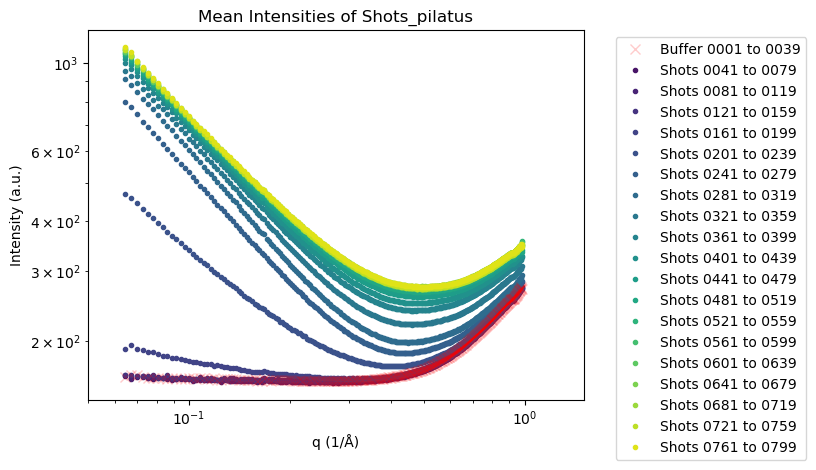

In [3]:
# Define the shot ranges
shots = [(41, 79), (81, 119), (121, 159), (161, 199), (201, 239), (241, 279), (281, 319), 
         (321, 359), (361, 399), (401, 439), (441, 479), (481, 519), (521, 559), (561, 599), (601, 639), (641, 679), (681, 719), (721, 759), (761, 799)]

buffer = (1,39)
config = 'pilatus'
plt.figure()

bufferdata = np.loadtxt(f'{config}_mean/mean_shots_{buffer[0]:04d}_to_{buffer[1]:04d}.dat')
plt.plot(bufferdata[:, 0], bufferdata[:, 1], 'x', markersize = 7, color='red', label=f'Buffer {buffer[0]:04d} to {buffer[1]:04d}', zorder = 1, alpha=0.2)
cmap = plt.get_cmap('viridis')
for r1, r2 in shots:
    
    data = np.loadtxt(f'{config}_mean/mean_shots_{r1:04d}_to_{r2:04d}.dat')
    q_values = data[:, 0]
    intensity_values = data[:, 1]

    plt.plot(q_values, intensity_values, 'o', markersize = 3, color=cmap(r1 / 800), label=f'Shots {r1:04d} to {r2:04d}',zorder=0)


plt.xscale('log')
plt.xlim(0.05, 1.5)
plt.yscale('log')
plt.ylabel('Intensity (a.u.)')
plt.xlabel('q (1/Å)')
plt.title(f'Mean Intensities of Shots_{config}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# #subtract buffer from sample

In [13]:
def save (config, r1, r2, q_values, intensity_values, propagated_err):
    # Save the mean intensity and propagated error to a file
    import os

    # Ensure the directory exists
    os.makedirs(f'{config}_sub', exist_ok=True)
    try:
        np.savetxt(
            f'{config}_sub/subtracted_data_{r1:04d}_to_{r2:04d}.dat',
            np.column_stack((q_values, intensity_values, propagated_err)),
            header="q intensity propagated_error"
        )
        print(f"Subtracted intensity and propagated errors computed for shots {r1:04d} to {r2:04d} with scale factor {scale:.2f}")
    except Exception as e:
        print(f"Error saving file for shots {r1:04d} to {r2:04d}: {e}")

In [ ]:
def scale_buffer(bufferdata, data):
    # Version 1, takes the intensity value from the last non-zero value of the buffer and data
    # Returns the scaling factor as the difference between the intensity of buffer and data
    
    buffer_I = bufferdata[:, 1]
    data_I = data[:, 1]

    # Find the last non-zero intensity index for buffer and data
    index_buffer = np.max(np.nonzero(buffer_I))
    index_data = np.max(np.nonzero(data_I))

    # Calculate the scaling factor
    scale = data_I[index_data]/ buffer_I[index_buffer]
    return scale

In [ ]:
from scipy.optimize import curve_fit

def scale_bufferv2(bufferdata, data):
    # Version 2, uses curve fitting to find the scaling factor
    # The range can be adjusted manually. Here, 295:361 is approximately q= 0.7 to 1 AA-1
    
    # Extract relevant data ranges
    data_I = data[295:361, 1]
    data_q = data[295:361, 0]

    # Define a model function for curve fitting
    def model(q, scale):
        return scale * bufferdata[295:361, 1]

    # Perform the curve fitting
    initial_guess = [1.0]
    popt, _ = curve_fit(model, data_q, data_I, p0=initial_guess)
    scalefitted = popt[0]

    return scalefitted

## Subtraction of of WAXS (pilatus) detector data

Subtracted intensity and propagated errors computed for shots 0041 to 0079 with scale factor 0.99
Subtracted intensity and propagated errors computed for shots 0081 to 0119 with scale factor 0.98
Subtracted intensity and propagated errors computed for shots 0121 to 0159 with scale factor 0.99
Subtracted intensity and propagated errors computed for shots 0161 to 0199 with scale factor 0.99
Subtracted intensity and propagated errors computed for shots 0201 to 0239 with scale factor 1.00
Subtracted intensity and propagated errors computed for shots 0241 to 0279 with scale factor 1.03
Subtracted intensity and propagated errors computed for shots 0281 to 0319 with scale factor 1.06
Subtracted intensity and propagated errors computed for shots 0321 to 0359 with scale factor 1.13
Subtracted intensity and propagated errors computed for shots 0361 to 0399 with scale factor 1.19
Subtracted intensity and propagated errors computed for shots 0401 to 0439 with scale factor 1.23
Subtracted intensity

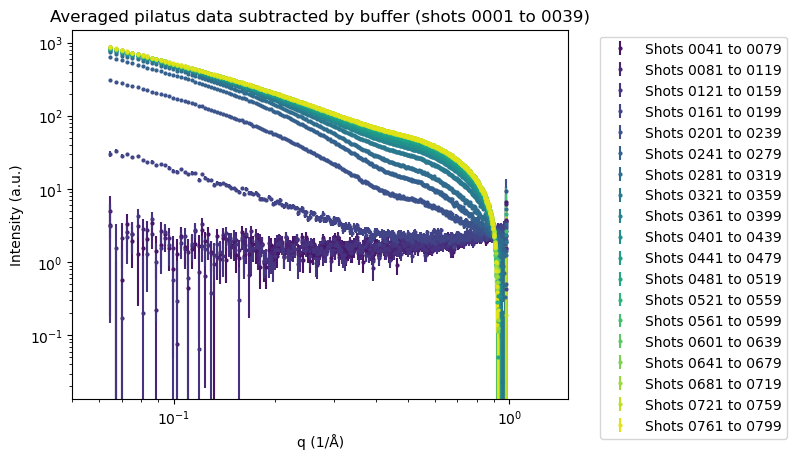

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the shot ranges
shots = [(41, 79), (81, 119), (121, 159), (161, 199), (201, 239), (241, 279), (281, 319), 
         (321, 359), (361, 399), (401, 439), (441, 479), (481, 519), (521, 559), (561, 599), (601, 639), (641, 679), (681, 719), (721, 759), (761, 799)]

buffer = (1,39)
config = 'pilatus'
config_buffer_scale = 2 # Set to 2 to use scale from curve fitting. Set to 1 if you want to scale the buffer using the last point only (v1). 0 if no scaling is needed.


plt.figure()

# Load the buffer data
bufferdata = np.loadtxt(f'{config}_mean/mean_shots_{buffer[0]:04d}_to_{buffer[1]:04d}.dat')
buffer_I = bufferdata[:, 1]
buffer_err= bufferdata[:, 2]

scale_factors = {}

cmap = plt.get_cmap('viridis')
for r1, r2 in shots:
    
    data = np.loadtxt(f'{config}_mean/mean_shots_{r1:04d}_to_{r2:04d}.dat')
    q_values = data[:, 0]
    intensity_values = data[:, 1]


    # Calculate or reuse the scale factor
    if (r1, r2) not in scale_factors:
        if config_buffer_scale ==1 : # Check if we need to scale the buffer
            scale = scale_buffer(bufferdata, data) 
        elif config_buffer_scale == 2: # Check if we need to scale the buffer
            scale = scale_bufferv2(bufferdata, data) 
        else:
            scale = 1.0
        scale_factors[(r1, r2)] = scale  # Store the scale factor
    else:
        scale = scale_factors[(r1, r2)]  # Reuse the scale factor if it has been computed before

    intensity_values -= (buffer_I*scale)

    data_Ierr = data[:, 2]
    propagated_err = np.sqrt(data_Ierr**2 + (buffer_err*scale)**2)

    plt.errorbar(q_values, intensity_values, yerr= propagated_err , fmt = 'o', markersize = 2 , color=cmap(r1 / 800), label=f'Shots {r1:04d} to {r2:04d}')
    #print(f"Subtracted intensity and propagated errors computed for shots {r1:04d} to {r2:04d} with scale factor {scale:.2f}")
    save (config, r1, r2, q_values, intensity_values, propagated_err) # uncomment if we want to save the data



plt.xscale('log')
plt.xlim(0.05, 1.5)

plt.yscale('log')
plt.ylabel('Intensity (a.u.)')
plt.xlabel('q (1/Å)')
plt.title(f'Averaged {config} data subtracted by buffer (shots {buffer[0]:04d} to {buffer[1]:04d})')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Subtraction of SAXS (eiger) detector data

Subtracted intensity and propagated errors computed for shots 0041 to 0079 with scale factor 0.99
Subtracted intensity and propagated errors computed for shots 0081 to 0119 with scale factor 0.98
Subtracted intensity and propagated errors computed for shots 0121 to 0159 with scale factor 0.99
Subtracted intensity and propagated errors computed for shots 0161 to 0199 with scale factor 0.99
Subtracted intensity and propagated errors computed for shots 0201 to 0239 with scale factor 1.00
Subtracted intensity and propagated errors computed for shots 0241 to 0279 with scale factor 1.03
Subtracted intensity and propagated errors computed for shots 0281 to 0319 with scale factor 1.06
Subtracted intensity and propagated errors computed for shots 0321 to 0359 with scale factor 1.13
Subtracted intensity and propagated errors computed for shots 0361 to 0399 with scale factor 1.19
Subtracted intensity and propagated errors computed for shots 0401 to 0439 with scale factor 1.23
Subtracted intensity

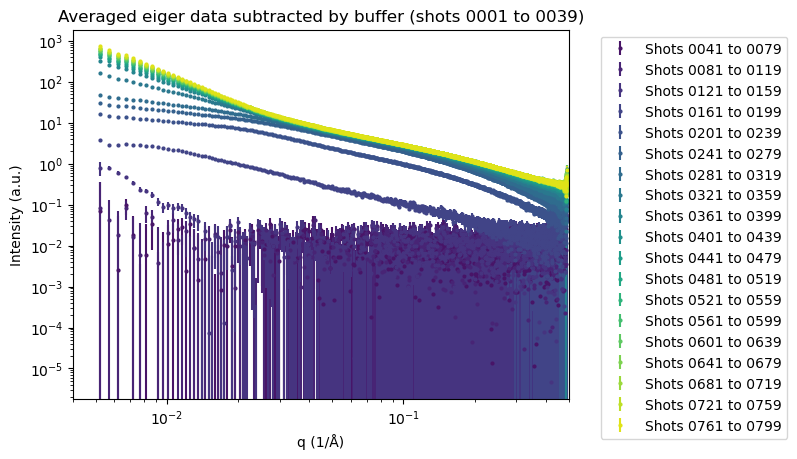

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the shot ranges
shots = [(41, 79), (81, 119), (121, 159), (161, 199), (201, 239), (241, 279), (281, 319), 
         (321, 359), (361, 399), (401, 439), (441, 479), (481, 519), (521, 559), (561, 599), (601, 639), (641, 679), (681, 719), (721, 759), (761, 799)]

buffer = (1,39)
config = 'eiger'
config_buffer_scale = True


plt.figure()

# Load the buffer data
bufferdata = np.loadtxt(f'{config}_mean/mean_shots_{buffer[0]:04d}_to_{buffer[1]:04d}.dat')
buffer_I = bufferdata[:, 1]
buffer_err= bufferdata[:, 2]


cmap = plt.get_cmap('viridis')
for r1, r2 in shots:
    
    data = np.loadtxt(f'{config}_mean/mean_shots_{r1:04d}_to_{r2:04d}.dat')
    q_values = data[:, 0]
    intensity_values = data[:, 1]


    # The scale factor should be based on the data from the WAXS detector (pilatus), so this section should always go to the final else clause.
    
    if (r1, r2) not in scale_factors:
        if config_buffer_scale: # Check if we need to scale the buffer
            scale = scale_buffer(bufferdata, data) * 0.97
        else:
            scale = 1.0
        scale_factors[(r1, r2)] = scale  # Store the scale factor
    else:
        scale = scale_factors[(r1, r2)]  # Reuse the scale factor

    intensity_values -= (buffer_I*scale)

    data_Ierr = data[:, 2]
    propagated_err = np.sqrt(data_Ierr**2 + (buffer_err*scale)**2)

    plt.errorbar(q_values, intensity_values, yerr= propagated_err , fmt = 'o', markersize = 2 , color=cmap(r1 / 800), label=f'Shots {r1:04d} to {r2:04d}')
    save (config, r1, r2, q_values, intensity_values, propagated_err) # uncomment if we want to save the data



plt.xscale('log')
plt.xlim(0.004, 0.5)

plt.yscale('log')
plt.ylabel('Intensity (a.u.)')
plt.xlabel('q (1/Å)')
plt.title(f'Averaged {config} data subtracted by buffer (shots {buffer[0]:04d} to {buffer[1]:04d})')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# #Plot subtracted data

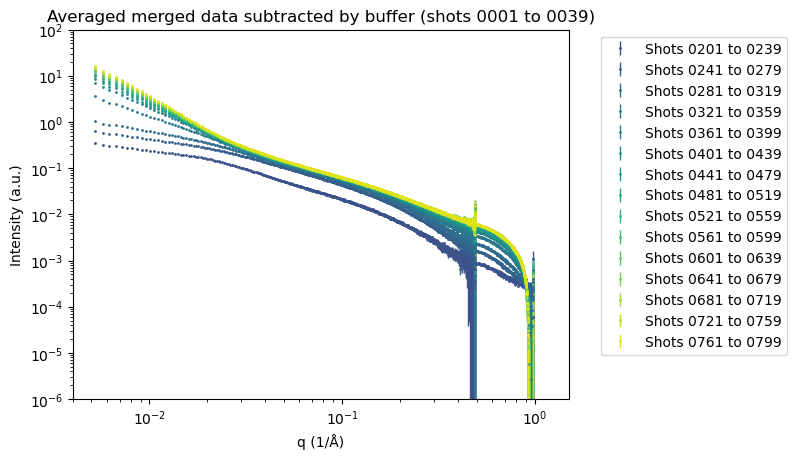

In [28]:
# Define the shot ranges
shots = [(201, 239), (241, 279), (281, 319), 
         (321, 359), (361, 399), (401, 439), (441, 479), (481, 519), (521, 559), (561, 599), (601, 639), (641, 679), (681, 719), (721, 759), (761, 799)]


plt.figure()


cmap = plt.get_cmap('viridis')
for r1, r2 in shots:
    
    data_eiger = np.loadtxt(f'eiger_sub/subtracted_data_{r1:04d}_to_{r2:04d}.dat')
    q_values_eiger = data_eiger[:, 0]
    intensity_values_eiger = data_eiger[:, 1]*0.0217
    Ierr_eiger = data_eiger[:, 2]*0.0217
    #0.0217 is the difference factor between data processed by me and the data received from Ann T. (which is about the same intensity as absolute scale data measured in normal batch mode)
    #0.0054 is the pilatus scaling factor to match eiger data

    data_pilatus = np.loadtxt(f'pilatus_sub/subtracted_data_{r1:04d}_to_{r2:04d}.dat')
    q_values_pilatus = data_pilatus[:, 0]
    intensity_values_pilatus = data_pilatus[:, 1]*0.0054*0.0217
    Ierr_pilatus = data_pilatus[:, 2]*0.0054*0.0217   

    plt.errorbar(q_values_eiger, intensity_values_eiger, yerr= Ierr_eiger , fmt = 'o', elinewidth=1, markersize = 1 , color=cmap(r1 / 800), label=f'Shots {r1:04d} to {r2:04d}')
    plt.errorbar(q_values_pilatus, intensity_values_pilatus, yerr= Ierr_pilatus , fmt = 'o', elinewidth=1, markersize = 1 , color=cmap(r1 / 800))
    #save (config, r1, r2, q_values, intensity_values, propagated_err) # uncomment if we want to save the data



plt.xscale('log')
plt.xlim(4e-03, 1.5)
plt.yscale('log')
plt.ylim(1e-6, 1e2)

plt.ylabel('Intensity (a.u.)')
plt.xlabel('q (1/Å)')
plt.title(f'Averaged merged data subtracted by buffer (shots {buffer[0]:04d} to {buffer[1]:04d})')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')